# Modelos generadores de grafos

In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
SEMILLA_ALEATORIEDAD = 123
np.random.seed(SEMILLA_ALEATORIEDAD)

In [2]:
floren_graph = nx.florentine_families_graph()
karate_graph = nx.karate_club_graph()

In [3]:
df_congress = pd.read_csv('congress_network\congress.csv', delimiter=';')
congress_graph = nx.DiGraph()
for index, row in df_congress.iterrows():
    congress_graph.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print("Nodos: ", congress_graph.number_of_nodes())
print("Aristas con pesos: ", congress_graph.number_of_edges())

Nodos:  475
Aristas con pesos:  13289


In [7]:
def plot_degree_distribution(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))
    p_k = degree_count / sum(degree_count)

    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar la distribución tal cual
    plt.plot(k, p_k, "o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Grafos aleatorios estáticos

## Erdös-Renyi

In [44]:
ER = nx.erdos_renyi_graph(1000, 0.15, directed=False)

In [52]:
# Función para plotear la distribución de grado
def plot_degree(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))

    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar la distribución tal cual
    plt.plot(k, degree_count, "o-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [5]:
# Función para plotear la distribución de grado
def plot_degree_distribution2(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))
    p_k = degree_count / sum(degree_count)

    # Filtrar grados con baja frecuencia
    #threshold = 0.0001  # Ajusta este valor según sea necesario
    threshold = 0
    filtered_k = k[p_k > threshold]
    filtered_p_k = p_k[p_k > threshold]

    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar la distribución tal cual
    plt.plot(filtered_k, filtered_p_k, "o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [47]:
def log_plot_degree_distribution(degrees, title, xlabel, ylabel):
    degree_count = np.bincount(degrees)
    k = np.arange(len(degree_count))
    p_k = degree_count / sum(degree_count)

    # Filtrar grados con baja frecuencia
    #threshold = 0.0001  # Ajusta este valor según sea necesario
    threshold = 0
    filtered_k = k[p_k > threshold]
    filtered_p_k = p_k[p_k > threshold]
    
    log_k = np.log(filtered_k)
    log_p_k = np.log(filtered_p_k)
    
    # Ploteo de la distribución de grado
    plt.figure(figsize=(10, 6))
    
    # Para dibujar el log-plot
    #plt.loglog(filtered_k, filtered_p_k, marker='o', linestyle='None', markersize=5)
    #plt.plot(np.log(filtered_k), np.log(filtered_p_k))
    
    # Para dibujar la distribución tal cual
    plt.plot(log_k, log_p_k, "o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.grid(True)
    """
    # Opcional: Agregar etiquetas para los nodos más conectados
    for i in range(len(filtered_k)):
        if filtered_p_k[i] > threshold:
            plt.text(filtered_k[i], filtered_p_k[i], str(filtered_k[i]), fontsize=8, ha='right')
    """
    plt.show()

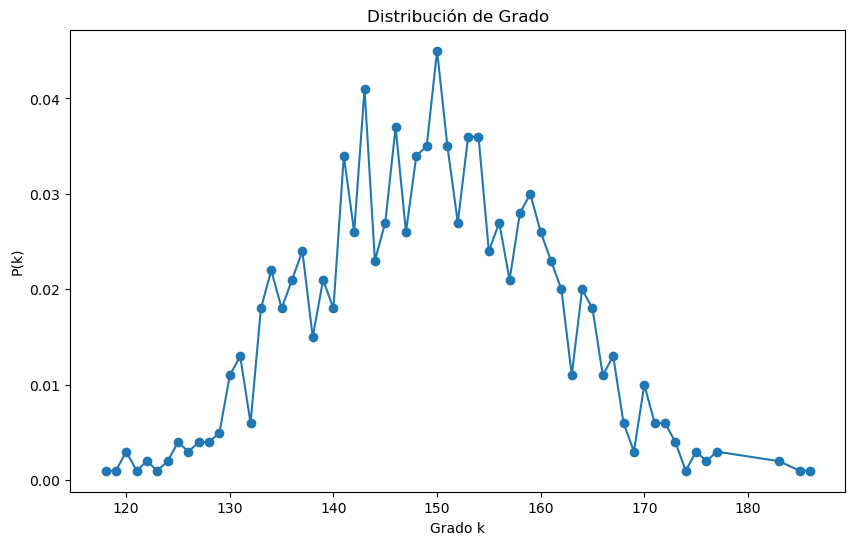

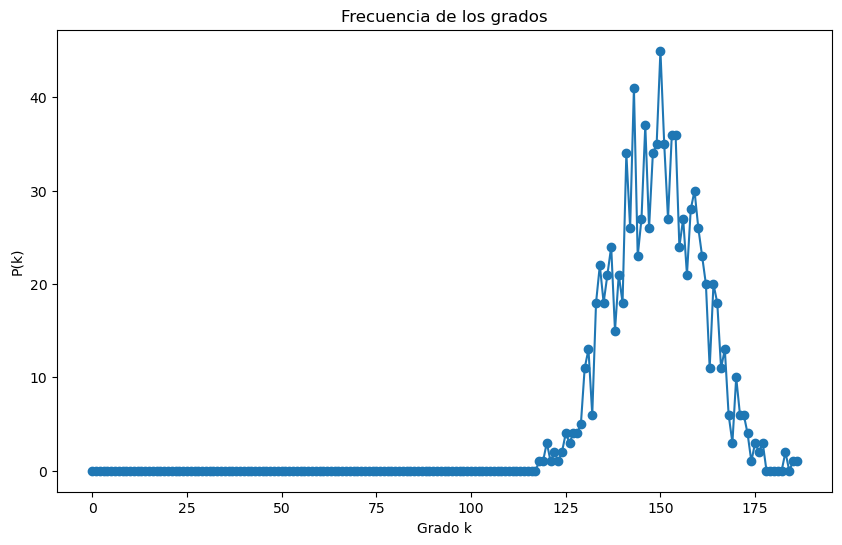

In [59]:
ER_degrees = [d for n, d in ER.degree()]

# Plotear distribuciones de grado de entrada y salida
plot_degree_distribution(ER_degrees, 'Distribución de Grado', 'Grado k', 'P(k)')
plot_degree(ER_degrees, 'Frecuencia de los grados', 'Grado k', 'P(k)')


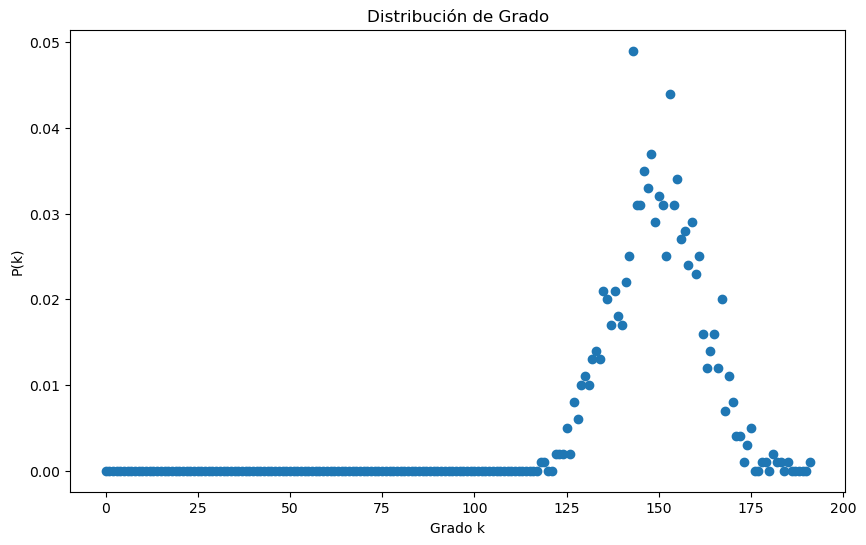

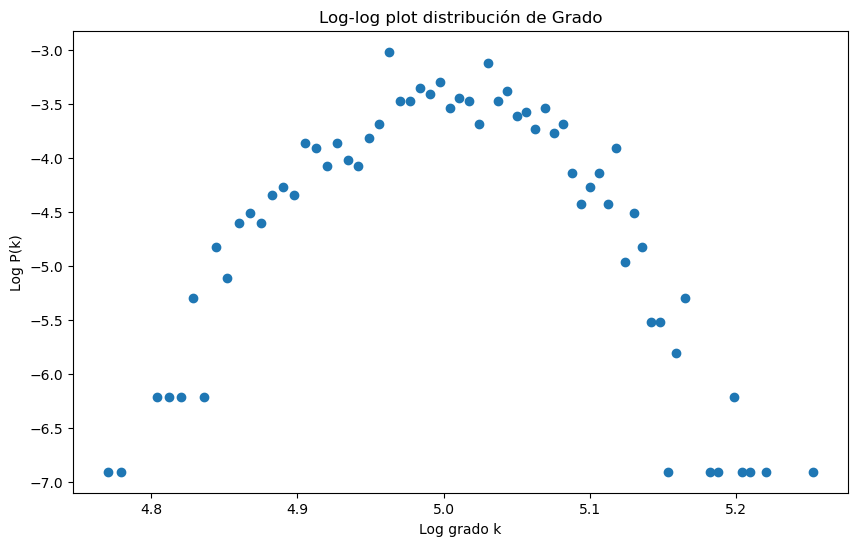

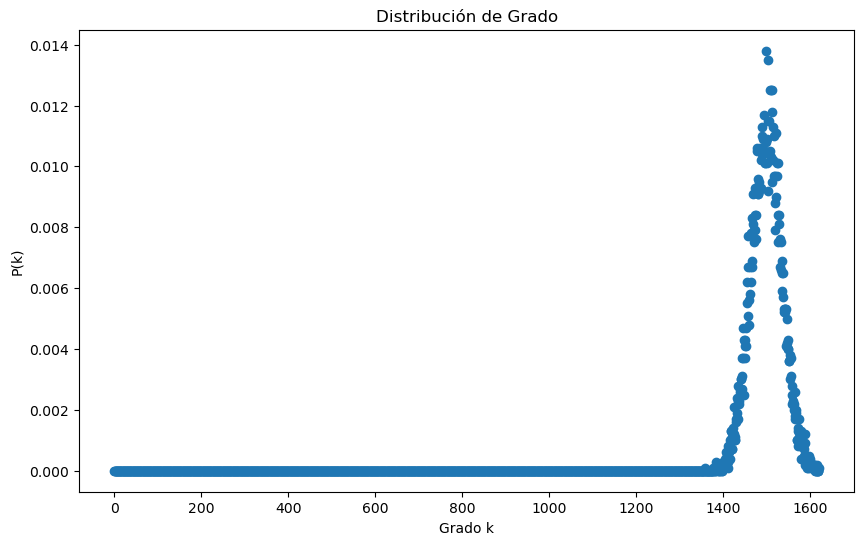

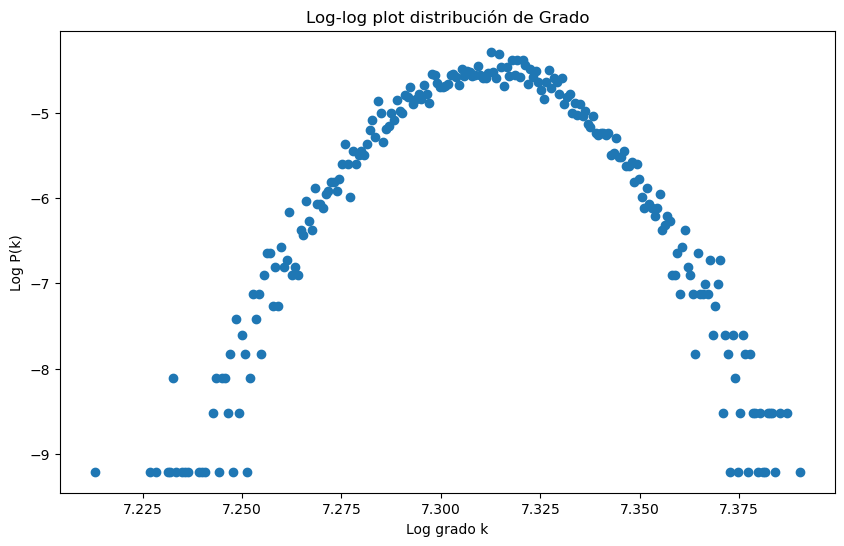

In [59]:
sizes = [1000, 10000]
for size in sizes:
    G = nx.erdos_renyi_graph(size, 0.15)
    G_degrees = [d for n, d in G.degree()]
    plot_degree_distribution(G_degrees, 'Distribución de Grado', 'Grado k', 'P(k)')
    log_plot_degree_distribution(G_degrees, 'Log-log plot distribución de Grado', 'Log grado k', 'Log P(k)')

In [60]:
G = nx.erdos_renyi_graph(1000, 0.15)
print(f'Diámetro: {nx.diameter(G)}')
print(f'Clustering medio: {nx.average_clustering(G)}')
print(f'Transitividad: {nx.transitivity(G)}')

Diámetro: 2
Clustering medio: 0.1509997309790105
Transitividad: 0.15096533622990557


## Watts-Strogatz

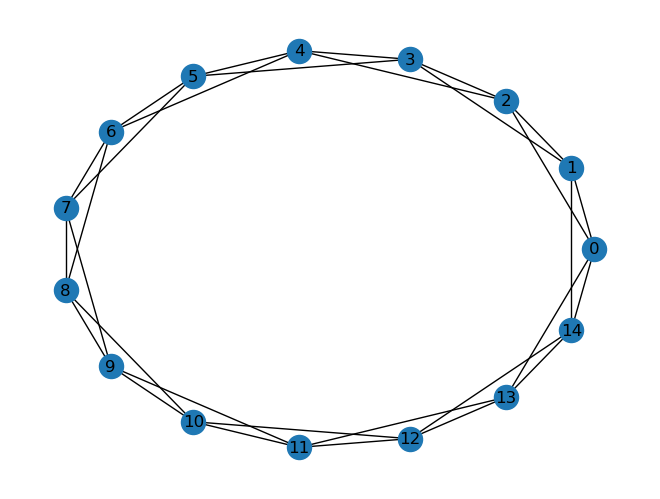

In [14]:
WT_graph = nx.watts_strogatz_graph(15, 4, 0, SEMILLA_ALEATORIEDAD)
nx.draw_circular(WT_graph, with_labels=True)
plt.show()

In [13]:
WT_graph.degree()

DegreeView({0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4})

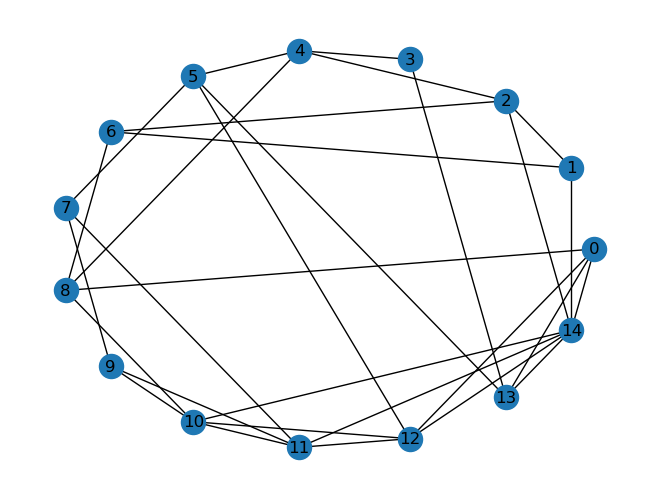

In [15]:
# Grafo generado con Watts-Strogatz, con 15 nodos, cada uno se une a 5 de sus vecinos 
# más cercanos, y una probabilidad de reconectar las aristas de 0.4
WT_graph = nx.watts_strogatz_graph(15, 4, 0.4, SEMILLA_ALEATORIEDAD)
nx.draw_circular(WT_graph, with_labels=True)
plt.show()

In [49]:
print(f'Diámetro: {nx.diameter(WT_graph)}')
print(f'Clustering medio: {nx.average_clustering(WT_graph)}')
print(f'Transitividad: {nx.transitivity(WT_graph)}')

Diámetro: 4
Clustering medio: 0.2946031746031746
Transitividad: 0.3


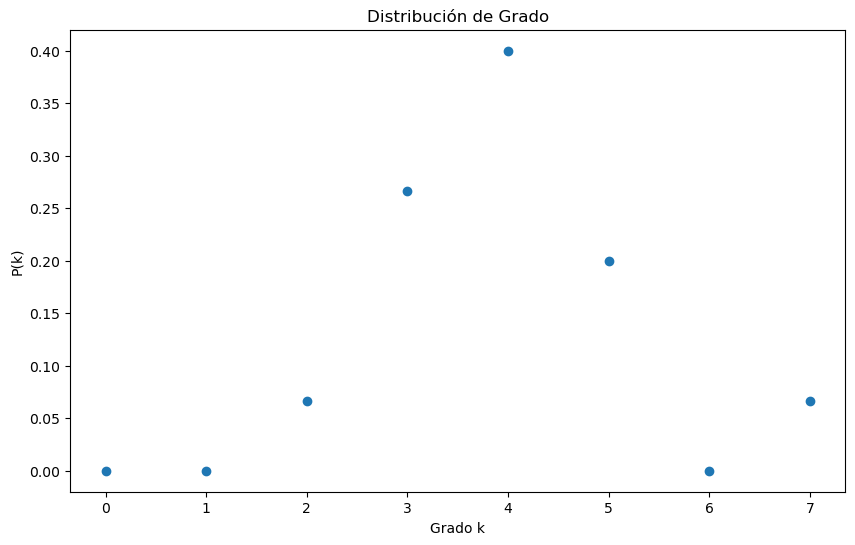

In [52]:
WT_degrees = [d for n, d in WT_graph.degree()]
plot_degree_distribution(WT_degrees, 'Distribución de Grado', 'Grado k', 'P(k)')

# Modelos evolutivos con apego preferencial

## Barabasi-Albert (o el de Price, según lo que ponga en el documento)

DegreeView({0: 4, 1: 1, 2: 1, 3: 1, 4: 1})

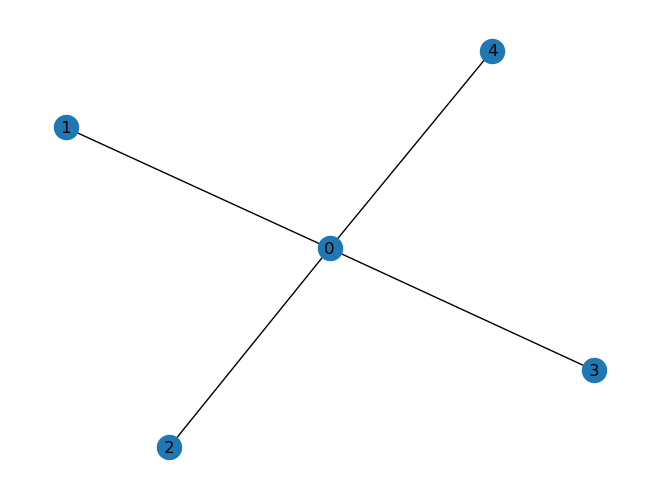

In [20]:
BA = nx.barabasi_albert_graph(5, 4, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)
BA.degree()

DegreeView({0: 8, 1: 4, 2: 4, 3: 2, 4: 3, 5: 5, 6: 5, 7: 5, 8: 4})

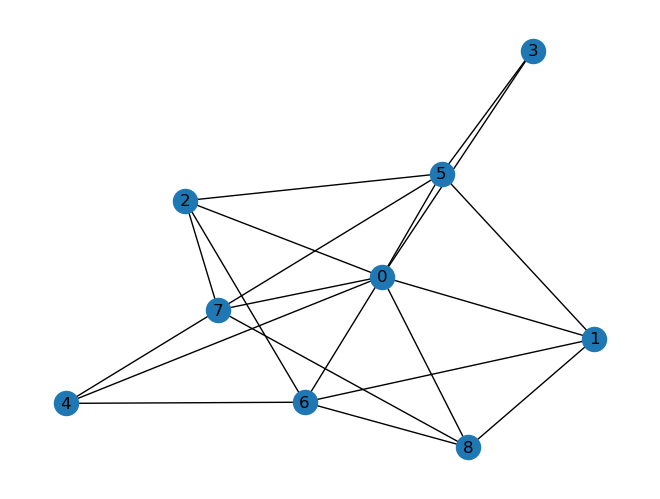

In [21]:
BA = nx.barabasi_albert_graph(9, 4, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)
BA.degree()

DegreeView({0: 11, 1: 5, 2: 6, 3: 4, 4: 4, 5: 6, 6: 5, 7: 6, 8: 7, 9: 4, 10: 5, 11: 5, 12: 4})

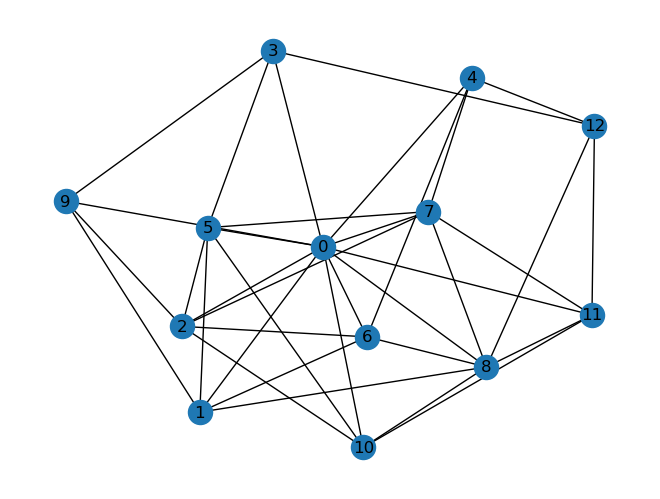

In [22]:
BA = nx.barabasi_albert_graph(13, 4, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)
BA.degree()

DegreeView({0: 12, 1: 6, 2: 7, 3: 5, 4: 5, 5: 6, 6: 6, 7: 6, 8: 7, 9: 5, 10: 7, 11: 8, 12: 6, 13: 5, 14: 5, 15: 4, 16: 4})

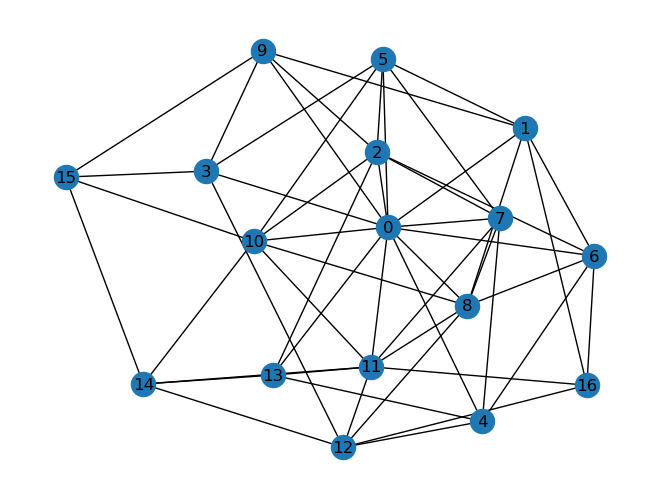

In [23]:
BA = nx.barabasi_albert_graph(17, 4, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)
BA.degree()

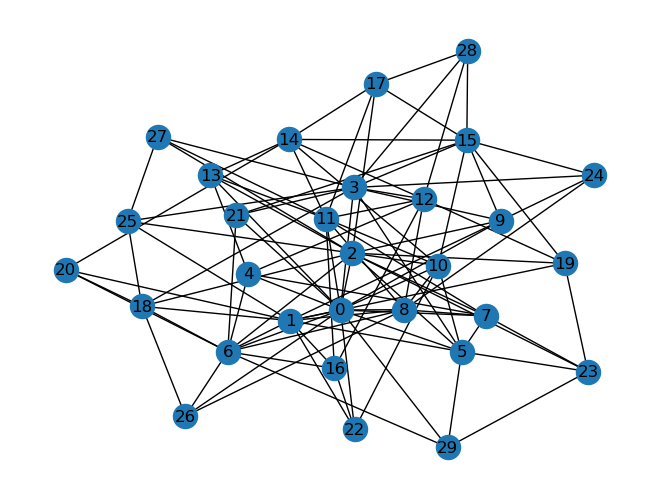

In [34]:
BA = nx.barabasi_albert_graph(30, 4, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)

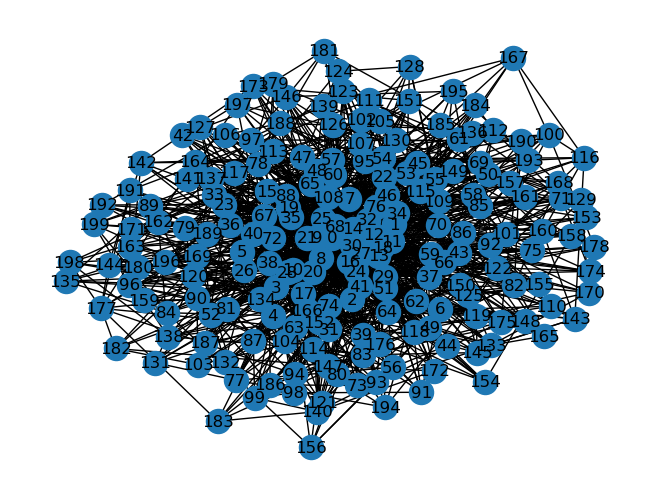

In [57]:
BA = nx.barabasi_albert_graph(200, 7, SEMILLA_ALEATORIEDAD)
pos = nx.spring_layout(BA)
nx.draw(BA, pos = pos, with_labels=True)

In [54]:
print(f'Diámetro: {nx.diameter(BA)}')
print(f'Clustering medio: {nx.average_clustering(BA)}')
print(f'Transitividad: {nx.transitivity(BA)}')

Diámetro: 4
Clustering medio: 0.13819346097592958
Transitividad: 0.12759359926498737


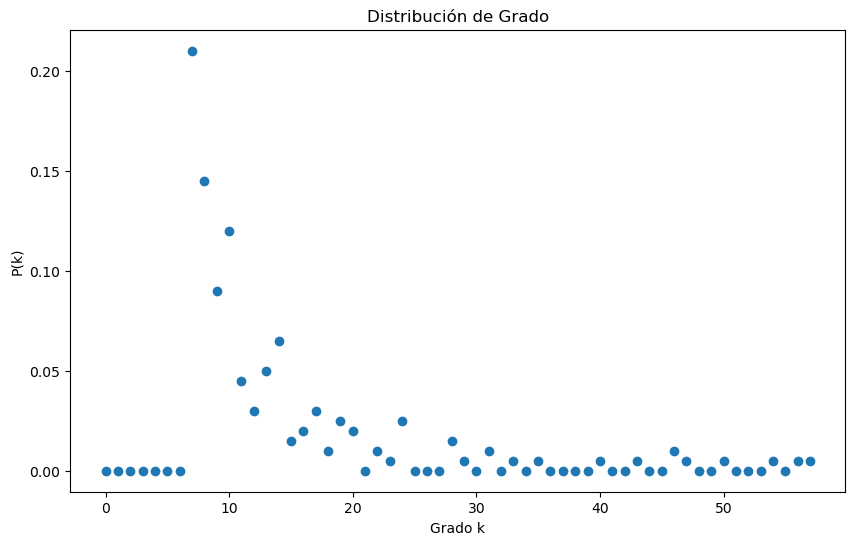

In [56]:
BA_degrees = [d for n, d in BA.degree()]
plot_degree_distribution(BA_degrees, 'Distribución de Grado', 'Grado k', 'P(k)')

Text(0, 0.5, 'Grados de k')

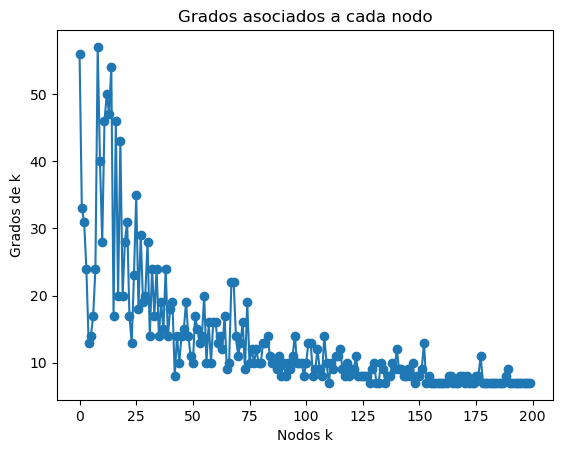

In [42]:
nodes = [node for node in BA.nodes()]
degree_sequence = [BA.degree(node) for node in BA.nodes()]
plt.plot(nodes, degree_sequence, 'o-')
plt.title("Grados asociados a cada nodo")
plt.xlabel("Nodos k")
plt.ylabel("Grados de k")

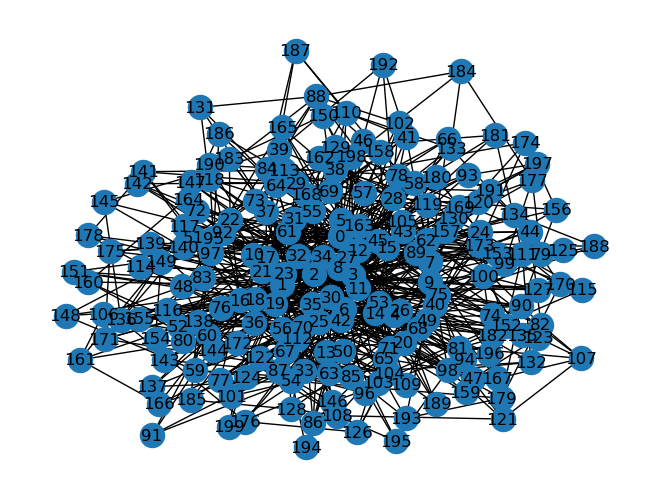

In [32]:
BA = nx.barabasi_albert_graph(200, 4, SEMILLA_ALEATORIEDAD)
nx.draw(BA, with_labels=True)

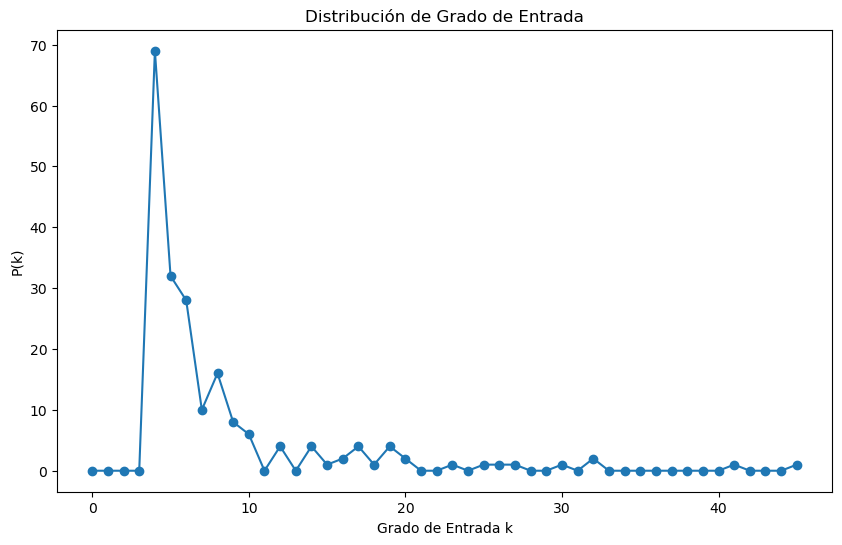

In [33]:
BA_degrees = [d for n, d in BA.degree()]
plot_degree(BA_degrees, 'Distribución de Grado de Entrada', 'Grado de Entrada k', 'P(k)')

In [25]:
BA.degree()

DegreeView({0: 12, 1: 8, 2: 10, 3: 6, 4: 5, 5: 6, 6: 7, 7: 6, 8: 7, 9: 5, 10: 7, 11: 9, 12: 7, 13: 5, 14: 6, 15: 6, 16: 4, 17: 4, 18: 4, 19: 4})

In [22]:
BA_degrees

[12, 8, 10, 6, 5, 6, 7, 6, 7, 5, 7, 9, 7, 5, 6, 6, 4, 4, 4, 4]

In [26]:
k = np.arange(len(BA_degrees))
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [24]:
degree_count = np.bincount(BA_degrees)
k = np.arange(len(degree_count))
p_k = degree_count / sum(degree_count)
p_k

array([0.  , 0.  , 0.  , 0.  , 0.2 , 0.15, 0.25, 0.2 , 0.05, 0.05, 0.05,
       0.  , 0.05])

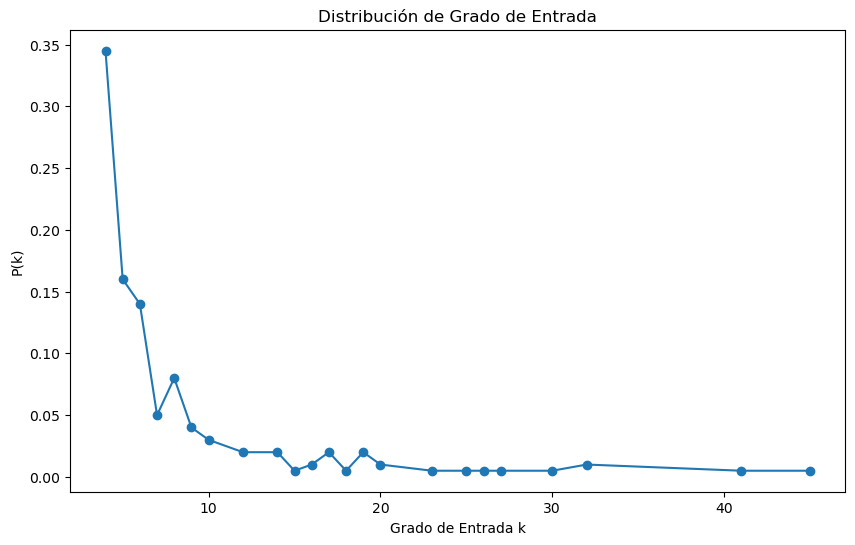

In [34]:
BA_degrees = [d for n, d in BA.degree()]
plot_degree_distribution(BA_degrees, 'Distribución de Grado de Entrada', 'Grado de Entrada k', 'P(k)')

In [41]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Jesus\AppData\Local\Temp\ipykernel_21176\1461081926.py:3: RuntimeWarning: divide by zero encountered in power
  y = x**alpha


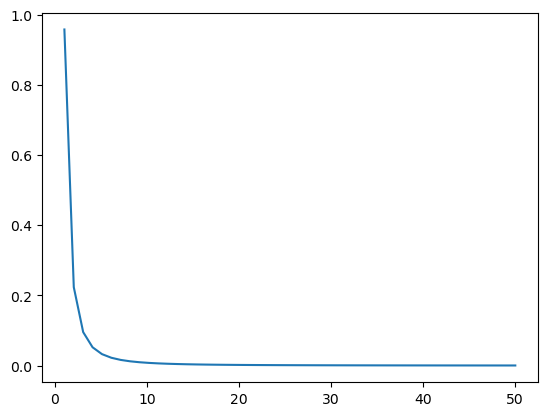

In [49]:
x = np.linspace(0, 50, 50)
alpha = -2.1
y = x**alpha
plt.plot(x, y)

In [73]:
BA_2 = nx.barabasi_albert_graph(1000, 7, SEMILLA_ALEATORIEDAD)

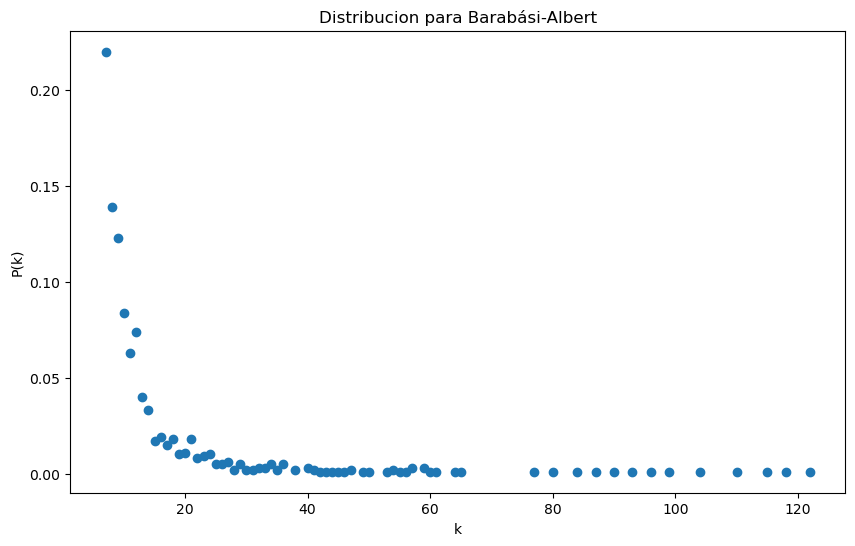

In [75]:
BA_2_degrees = [d for n, d in BA_2.degree()]
plot_degree_distribution(BA_2_degrees, "Distribucion para Barabási-Albert", "k", "P(k)")

In [76]:
nx.transitivity(BA_2)

0.04035237123053583

In [77]:
nx.transitivity(nx.complete_graph(5))

1.0

In [78]:
nx.transitivity(ER)

0.14941042511712024